**Instalando as Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrir um arquivo CSV**

In [19]:
base = pd.read_csv('train.csv', sep=',')

In [21]:
base.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
base.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando as Instancias**

In [27]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

TypeError: '<' not supported between instances of 'float' and 'str'

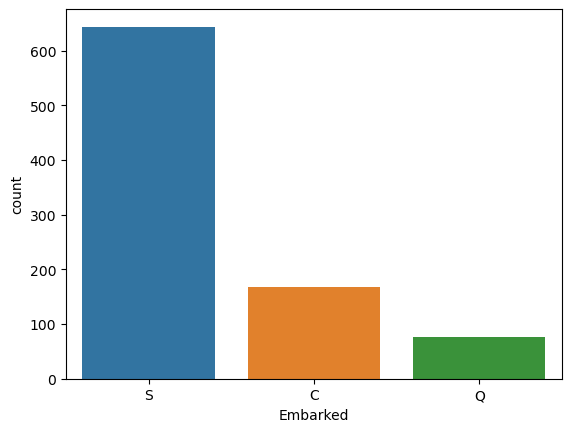

In [26]:
sns.countplot(x = base[Classificação]);

**LabelEncoder - Vamos tratar os dados**

In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Name', 'Sex', 'Age','Ticket', 'Cabin']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [33]:
base.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,28,1,0,523,7.2500,147,S
1,2,1,1,190,0,51,1,0,596,71.2833,81,C
2,3,1,3,353,0,34,0,0,669,7.9250,147,S
3,4,1,1,272,0,47,1,0,49,53.1000,55,S
4,5,0,3,15,1,47,0,0,472,8.0500,147,S




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [35]:
len(np.unique(base['Survived']))

2

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
cols_onehot_encode = ['Sex']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [41]:
base_encoded

,Sex_0,Sex_1,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,1.0,1,0,3,108,28,1,0,523,7.2500,147,S
1,1.0,0.0,2,1,1,190,51,1,0,596,71.2833,81,C
2,1.0,0.0,3,1,3,353,34,0,0,669,7.9250,147,S
3,1.0,0.0,4,1,1,272,47,1,0,49,53.1000,55,S
4,0.0,1.0,5,0,3,15,47,0,0,472,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,887,0,2,548,35,0,0,101,13.0000,147,S
887,1.0,0.0,888,1,1,303,24,0,0,14,30.0000,30,S
888,1.0,0.0,889,0,3,413,88,1,2,675,23.4500,147,S
889,0.0,1.0,890,1,1,81,34,0,0,8,30.0000,60,C


In [44]:
base_encoded.shape

(891, 13)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [45]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_prev

,Sex_0,Sex_1,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0.0,1.0,1,0,3,108,28,1,0,523,7.2500,147
1,1.0,0.0,2,1,1,190,51,1,0,596,71.2833,81
2,1.0,0.0,3,1,3,353,34,0,0,669,7.9250,147
3,1.0,0.0,4,1,1,272,47,1,0,49,53.1000,55
4,0.0,1.0,5,0,3,15,47,0,0,472,8.0500,147
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,887,0,2,548,35,0,0,101,13.0000,147
887,1.0,0.0,888,1,1,303,24,0,0,14,30.0000,30
888,1.0,0.0,889,0,3,413,88,1,2,675,23.4500,147
889,0.0,1.0,890,1,1,81,34,0,0,8,30.0000,60


In [48]:
y_classe

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [49]:
y_classe.shape

(891,)

In [50]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [51]:
X_treino.shape

(712, 12)

In [52]:
X_teste

,Sex_0,Sex_1,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
709,0.0,1.0,710,1,3,561,88,1,1,189,15.2458,147
439,0.0,1.0,440,0,2,447,41,0,0,547,10.5000,147
840,0.0,1.0,841,0,3,11,25,0,0,647,7.9250,147
720,1.0,0.0,721,1,2,331,10,0,1,155,33.0000,147
39,1.0,0.0,40,1,3,589,18,1,0,186,11.2417,147
...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,1.0,434,0,3,420,22,0,0,657,7.1250,147
773,0.0,1.0,774,0,3,235,88,0,0,201,7.2250,147
25,1.0,0.0,26,1,3,44,51,1,5,329,31.3875,147
84,1.0,0.0,85,1,2,386,22,0,0,637,10.5000,147


In [53]:
y_treino

331    S
733    S
382    S
704    S
813    S
      ..
106    S
270    S
860    S
435    S
102    S
Name: Embarked, Length: 712, dtype: object

In [54]:
y_teste

709    C
439    S
840    S
720    S
39     C
      ..
433    S
773    C
25     S
84     S
10     S
Name: Embarked, Length: 179, dtype: object

In [55]:
import pickle

In [56]:
with open('train.csv', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)